In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
# import acquire
import prepare
import wrangle
from wordcloud import WordCloud
import nltk.sentiment
# pd.set_option('display.max_colwidth', None)
from time import strftime
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import os

In [2]:
# df=acquire.make_json(cached=True)
df = pd.read_json('repo_readmes.json')
df.head()

repo    language  \
0          bitcoin/bitcoin         C++   
1  bitcoinbook/bitcoinbook    AsciiDoc   
2        bitcoinj/bitcoinj        Java   
3             bitcoin/bips    Wikitext   
4  bitcoinjs/bitcoinjs-lib  TypeScript   

                                     readme_contents  
0  Bitcoin Core integration/staging tree\n=======...  
1  Code Examples: ![travis_ci](https://travis-ci....  
2  [![Github Build Status](https://github.com/bit...  
3  People wishing to submit BIPs, first should pr...  
4  # BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...

In [3]:
df.shape

(960, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             960 non-null    object
 1   language         960 non-null    object
 2   readme_contents  960 non-null    object
dtypes: object(3)
memory usage: 30.0+ KB


In [5]:
# # SPLIT
# from sklearn.model_selection import train_test_split
# # Test set is .2 of original dataframe
# train, test = train_test_split(df, test_size = .2, random_state=123, stratify= df.language)
# # The remainder is here divided .7 to train and .3 to validate
# train, validate = train_test_split(train, test_size=.3, random_state=123, stratify= train.language)
# train.shape, validate.shape, test.shape


In [6]:
# train.shape, validate.shape, test.shape

In [7]:
# X_train = train.drop(columns=['language'])
# y_train = pd.DataFrame(train.language, columns=['language'])

# X_validate = validate.drop(columns=['language'])
# y_validate = pd.DataFrame(validate.language, columns=['language'])

# X_test = test.drop(columns=['language'])
# y_test = pd.DataFrame(test.language, columns=['language'])

# train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape


In [8]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
wrangle.split_repos(df)

In [9]:
df.language.value_counts(normalize = True)

C++           0.2
Java          0.2
Wikitext      0.1
HTML          0.1
TypeScript    0.1
C             0.1
Python        0.1
AsciiDoc      0.1
Name: language, dtype: float64

In [10]:
df[df.language=='Wikitext']

repo  language                                    readme_contents
3    bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
13   bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
23   bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
33   bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
43   bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
..            ...       ...                                                ...
913  bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
923  bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
933  bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
943  bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...
953  bitcoin/bips  Wikitext  People wishing to submit BIPs, first should pr...

[96 rows x 3 columns]

In [68]:
# combine all contents in single string by language

from prepare import *

java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
c_plus_plus_words = basic_clean(' '.join(df[df.language == 'C++'].readme_contents))
wiki_words = basic_clean(' '.join(train[train.language == 'Wikitext'].readme_contents))
type_words = basic_clean(' '.join(df[df.language == 'TypeScript'].readme_contents))
c_words = basic_clean(' '.join(df[df.language == 'C'].readme_contents))
ascii_words = basic_clean(' '.join(df[df.language == 'AsciiDoc'].readme_contents))
python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
html_words = basic_clean(' '.join(df[df.language == 'HTML'].readme_contents))
all_words = basic_clean(' '.join(df.readme_contents))

In [103]:
java = pd.DataFrame(pd.Series(java_words.split()))
c_plus_plus = pd.DataFrame(pd.Series(c_plus_plus_words.split()))

In [105]:
# temp = pd.DataFrame({})
# temp
# temp['java']=java
# temp['c_plus_plus']=c_plus_plus

In [101]:
java.shape, c_plus_plus.shape

((68256, 2), (88224, 1))

In [13]:
languages_words_list = [
java_words,
c_plus_plus__words,
wiki_words,
type_words,
c_words,
ascii_words,
python_words,
html_words
]


In [14]:
# represent contents as word frequencies

java_freq = pd.Series(java_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus__words.split()).value_counts()
wiki_freq = pd.Series(wiki_words.split()).value_counts()
type_freq = pd.Series(type_words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
ascii_freq = pd.Series(ascii_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()

all_freq = pd.Series(all_words.split()).value_counts()


In [15]:

word_counts = pd.concat([java_freq, c_plus_plus_freq, wiki_freq, type_freq,c_freq, ascii_freq, python_freq, html_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['Java', 'C++', 'Wiki', 'Type', 'C', 'ASCII', 'Python', 'HTML', 'ALL']
word_counts.head()

Java   C++  Wiki  Type    C  ASCII  Python  HTML    ALL
the  4512  3648   530  3744   96   2400    1632   768  17760
and  2304  2496   530  4224  192   1056     288   192  11712
to   2016  2016   318  2592  192   1248     864   288   9792
for  1632  1824  1696  1632  192    384     288    96   9120
a    1536   864   583  5568   96   1728     384   576  11808

In [16]:
java_words_series = pd.Series(java_words.split())
java_words_series.value_counts()

the         4512
and         2304
to          2016
for         1632
a           1536
            ... 
includes      96
runs          96
unpack        96
focal         96
actions       96
Length: 310, dtype: int64

### Wordcloud is a pip install--for reproducibility

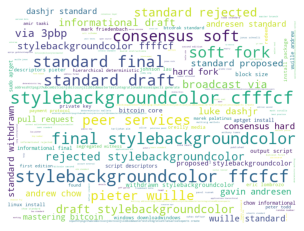

In [17]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off');

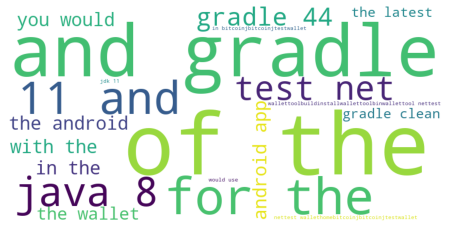

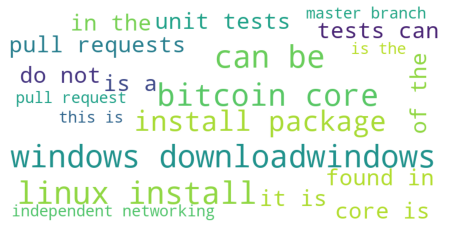

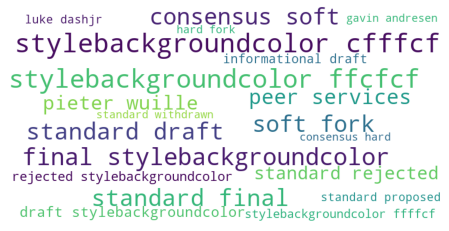

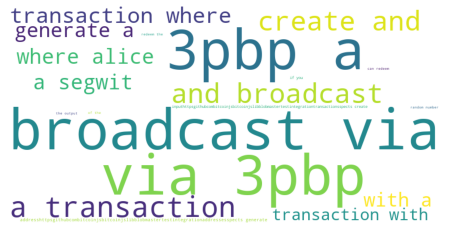

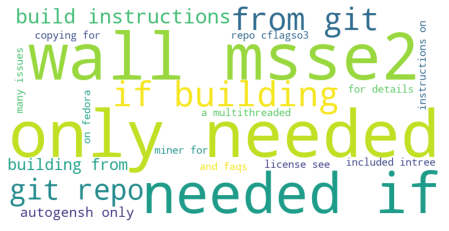

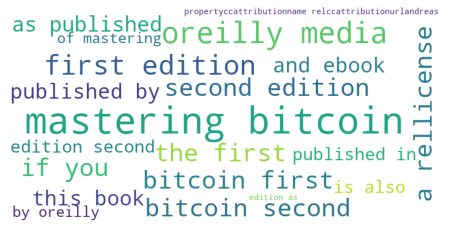

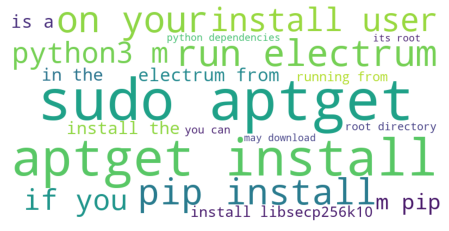

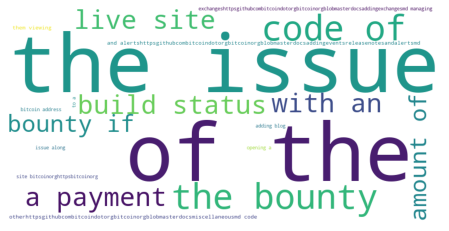

In [18]:
for language in languages_words_list:
    bigrams = pd.Series(nltk.bigrams(language.split())).value_counts().head(20)


    data = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [19]:
# # value_counts bc we want the most commonly occuring bigrams at the forefront
# java_bigrams = pd.Series(nltk.bigrams(java_words.split())).value_counts().head(20)


# data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
# img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
# plt.figure(figsize=(8, 4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [20]:
# # value_counts bc we want the most commonly occuring bigrams at the forefront
# java_trigrams = pd.Series(nltk.trigrams(java_words.split())).value_counts().head(20)


# data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in java_trigrams.to_dict().items()}
# img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
# plt.figure(figsize=(8, 4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

- I'm not a huge fan of the trigrams viz, maybe the bigrams loop.  
- Also, there are no words in the wiki words set

<Figure size 1440x648 with 0 Axes>

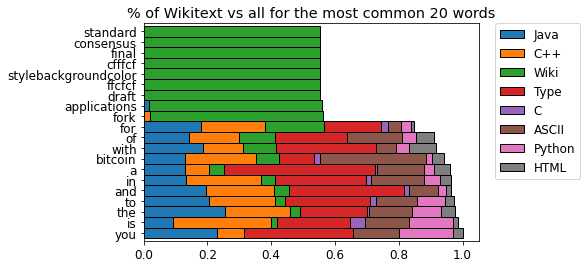

In [21]:
plt.figure(figsize=(20, 9))
plt.rc('font', size=12)

(word_counts.sort_values('ALL', ascending=False)
 .head(20)
 .apply(lambda row: row/row['ALL'], axis = 1)
 .drop(columns = 'ALL')
 .sort_values(by = 'Wiki')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of Wikitext vs all for the most common 20 words')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

#### Networkx has to be installed using pip or conda

In [22]:
import networkx as nx
import plotly.graph_objects as go

In [26]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
nx.shortest_path(G, 'A', 'D', weight='weight')
['A', 'B', 'D']

['A', 'B', 'D']

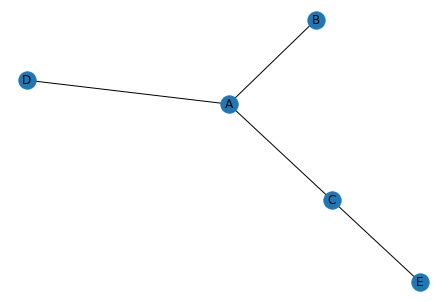

In [27]:
# Build a dataframe with 4 connections
sample = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# Build your graph
G=nx.from_pandas_edgelist(sample, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [45]:
G = nx.random_geometric_graph(200, 0.125,seed=None)

In [46]:
# G.edges
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199))

In [47]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [48]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [49]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [56]:
G=nx.Graph()

In [57]:
# java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
# c_plus_plus__words = basic_clean(' '.join(df[df.language == 'C++'].readme_contents))
# wiki_words = basic_clean(' '.join(train[train.language == 'Wikitext'].readme_contents))
# type_words = basic_clean(' '.join(df[df.language == 'TypeScript'].readme_contents))
# c_words = basic_clean(' '.join(df[df.language == 'C'].readme_contents))
# ascii_words = basic_clean(' '.join(df[df.language == 'AsciiDoc'].readme_contents))
# python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
# html_words = basic_clean(' '.join(df[df.language == 'HTML'].readme_contents))

In [58]:
G.add_edge(java_words)
G.add_edge(c_plus_plus__words)
G.add_edge(wiki_words)
G.add_edge(type_words)
G.add_edge(c_words)
G.add_edge(ascii_words)
G.add_edge(python_words)
G.add_edge(html_words)

TypeError: add_edge() missing 1 required positional argument: 'v_of_edge'

In [53]:
G.nodes

NodeView(('github build statushttpsgithubcombitcoinjbitcoinjworkflowsjava20cibadgesvghttpsgithubcombitcoinjbitcoinjactions\ngitlab build statushttpsgitlabcombitcoinjbitcoinjbadgesmasterpipelinesvghttpsgitlabcombitcoinjbitcoinjpipelines\ncoverage statushttpscoverallsioreposbitcoinjbitcoinjbadgepngbranchmasterhttpscoverallsiorbitcoinjbitcoinjbranchmaster\n\nvisit our irc channelhttpskiwiirccombuttonsircfreenodenetbitcoinjpnghttpskiwiirccomclientircfreenodenetbitcoinj\n\n welcome to bitcoinj\n\nthe bitcoinj library is a java implementation of the bitcoin protocol which allows it to maintain a wallet and sendreceive transactions without needing a local copy of bitcoin core it comes with full documentation and some example apps showing how to use it\n\n technologies\n\n java 8 needs java 8 api or android 70 api compiles to java 8 bytecode and gradle 44 for the core module\n java 11 and gradle 44 for tools wallettool and examples\n java 11 and gradle 410 for the javafxbased wallettemplate\n 

In [36]:
G.add_edges_from(all_words)

NetworkXError: Edge tuple b must be a 2-tuple or 3-tuple.